# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [28]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
#carregando os dados
df_renda = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv', sep = ',', decimal='.')
#selecionando apenas variáveis quantitativas
df_renda_quant = df_renda.select_dtypes(include='number')
#excluindo colunas desnecessárias
del df_renda_quant['Unnamed: 0']
del df_renda_quant['index']
# exibindo as 5 primeiras linhas do df filtrado:
df_renda_quant.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [19]:
# mostrando a matriz de correlação
df_renda_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


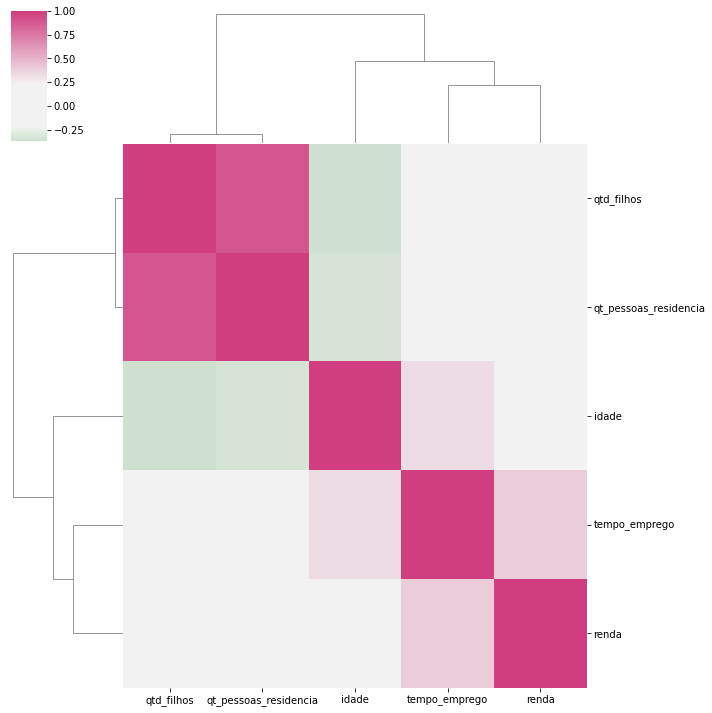

In [20]:
#gráfico da matriz
#construindo a paleta de cores
#sns.diverging_palette(): constrói uma paleta degrade entre duas cores HUSL
cmap = sns.diverging_palette(h_neg=125, #a cor do menor valor da matriz :-1
h_pos=350, #a cor do maior valor da matriz :+1
as_cmap=True, # Se True, retorna uma classe :class:`matplotlib.colors.Colormap`
sep = 60, #Tamanho da região intermediária
center = 'light'# Se o centro da paleta é claro(light) ou escuro(dark)
)

#construindo o gráfico
sns.clustermap(df_renda_quant.corr(), figsize=(10, 10), center = 0, cmap=cmap)

Obviamente a quantidade de filhos tem forte relação com a quantidade de pessoas na residência, mas quanto a renda, nessa primeira análise temos apenas uma fraca correlação com o tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

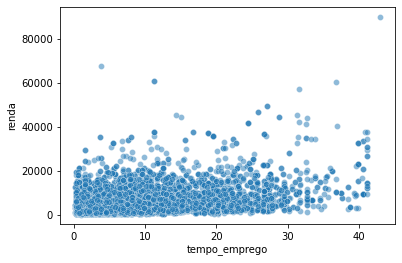

In [34]:
sns.scatterplot(x = 'tempo_emprego'
, y = 'renda'
, data = df_renda_quant
, alpha = .5
)

<AxesSubplot:xlabel='idade', ylabel='renda'>

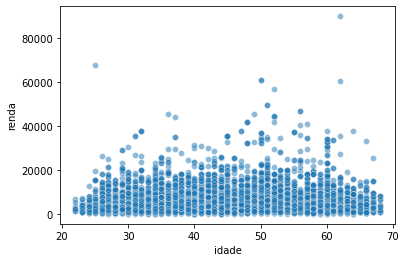

In [26]:
sns.scatterplot(x = 'idade'
, y = 'renda'
, data = df_renda_quant
, alpha = .5
)

3) Na su aopinião, há outliers na variável renda?

A grande maioria das pessoas estão concentradas na faixa de renda de 0 a 20 mil, há alguns poucos com renda muito acima dessa faixa (o que inclusive tonra difícil a avaliação do gráfico scatterplot), podendo ser outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [29]:
df_renda_quant_log = df_renda_quant.copy()
df_renda_quant_log['log_renda'] = np.log(df_renda_quant_log['renda'])



In [38]:
# mostrando a matriz de correlação df_renda_quant_log
df_renda_quant_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


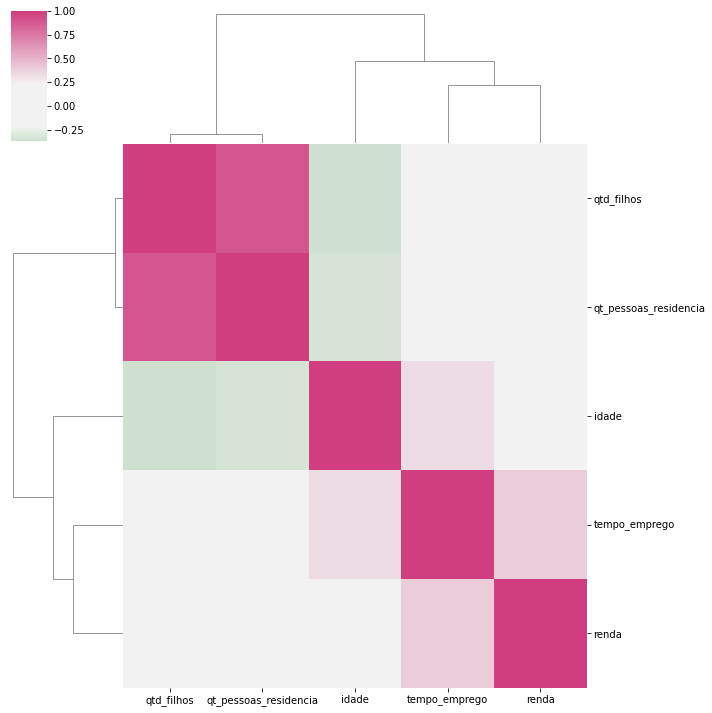

In [39]:
#gráfico da matriz
#construindo a paleta de cores
#sns.diverging_palette(): constrói uma paleta degrade entre duas cores HUSL
cmap = sns.diverging_palette(h_neg=125, #a cor do menor valor da matriz :-1
h_pos=350, #a cor do maior valor da matriz :+1
as_cmap=True, # Se True, retorna uma classe :class:`matplotlib.colors.Colormap`
sep = 60, #Tamanho da região intermediária
center = 'light'# Se o centro da paleta é claro(light) ou escuro(dark)
)

#construindo o gráfico
sns.clustermap(df_renda_quant.corr(), figsize=(10, 10), center = 0, cmap=cmap)

<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

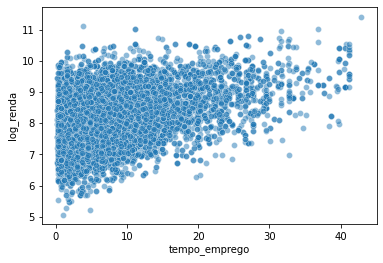

In [35]:
sns.scatterplot(x='tempo_emprego', y='log_renda', data = df_renda_quant_log, alpha = .5)

<AxesSubplot:xlabel='idade', ylabel='log_renda'>

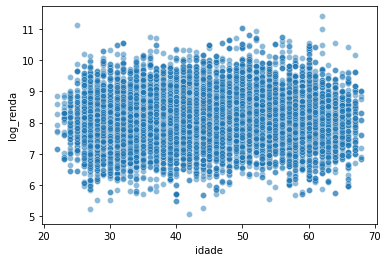

In [36]:
sns.scatterplot(x='idade', y='log_renda', data = df_renda_quant_log, alpha = .5)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Não houve muita melhora, as correlações entre as variaveis mudaram pouco e a correlação do tempo de emprego com a renda até diminuiu.